# Authors

*The work can be done in groups of up to 3 students. Please complete the following fields with your group number and list your names along with ISU ID numbers.*

---
> **Stream:** *[RZZZ] Technical Vision*
> 1. Name, ISU id
> 2. Name, ISU id
> 3. Name, ISU id
---

The task and guidelines were prepared by Andrei Zhdanov And Sergei Shavetov from ITMO University in 2024.

# Practical Assignment No 2. Images Geometric Transformations

Studying of mapping main types and using geometric transforma- tions for spatial image correction.

## Task 1. Simplest geometric transformations

*Select an arbitrary image. Perform linear and nonlinear transformations over it (Eucidean, affine and projective mappings).*

Images geometric transformations imply a spatial change in the location of pixels set with integer coordinates $(x,y)$ to another set with coordinates $(x',y')$, and the pixels intensity doesn't changes. In two-dimensional plane geometric transformations, as a rule, Euclidean space is used $\mathbf{P}^2$ with an orthonormal Cartesian coordinate system. In this case, the image pixel corresponds to a pair of Cartesian coordinates, which are interpreted as a two-dimensional vector represented by a segment from a point $(0,0)$ to a point $X_i=(x_i,y_i)$. Two-dimensional transformations on a plane can be represented as the points movement corresponding to a pixels plurality.

For generality with further transformations, we will use *homogeneous coordinates*. If homogeneous coordinates of a point are multiplied by a non-zero scalar then the resulting coordinates represent the same point. Due to this the required coordinates number to represent points is always one more than the space dimension $\mathbf{P}^n$, in which these coordinates are used. For example, to represent a point $X=(x,y)$ on a plane in two-dimensional space $\mathbf{P}^2$ three coordinates are required $X=(x,y,w)$. Let's illustrate this with the following example:

$$
	\begin{bmatrix} x' \\ y' \\ w \end{bmatrix} = w
	\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
	\Leftrightarrow 
	\begin{bmatrix} x' & y' & w \end{bmatrix} =
	\begin{bmatrix} x & y & 1 \end{bmatrix}w
$$

where $w$ is an arbitrary scalar factor, $x=\dfrac{x'}{w}$, $y=\dfrac{y'}{w}$.

Any linear transformation of the plane can be described using triples of homogeneous coordinates and third order matrices. Thus, geometric transformations are matrix transformations, and the sets pixel coordinates of the transformed and original images are related by the following matrix relation or in a row form  $X'=XT$, or in a column form $X'=T^{\mathrm{T}}X$. Let's rewrite these relations:

$$
	\begin{bmatrix} x' & y' & w' \end{bmatrix} = 
	\begin{bmatrix} x & y & w \end{bmatrix}
	\cdot
	\begin{bmatrix} 
		A & D & G 
		\\ B & E & H 
		\\ C & F & I
	\end{bmatrix}
$$

$$
\Leftrightarrow
	\begin{bmatrix} x' \\ y' \\ w' \end{bmatrix} = 
	\begin{bmatrix} 
		A & B & C 
		\\ D & E & F 
		\\ G & H & I
	\end{bmatrix} \cdot
	\begin{bmatrix} x \\ y \\ w \end{bmatrix}
$$

Point with Cartesian coordinates $(x,y)$ in homogeneous coordinates is written as $(x,y,1)$:

$$
	\begin{bmatrix} x' & y' & 1 \end{bmatrix} = 
	\begin{bmatrix} x & y & 1 \end{bmatrix}
	\cdot
	\begin{bmatrix} 
		A & D & 0 
		\\ B & E & 0 
		\\ C & F & 1
	\end{bmatrix}
$$

$$
	\Leftrightarrow
	\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = 
	\begin{bmatrix} 
		A & B & C 
		\\ D & E & F 
		\\ 0 & 0 & 1
	\end{bmatrix} \cdot
	\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

So, the transformation formula  can be rewritten as following system equations:

$$
	\begin{cases}
		x'=Ax+By+C, 
		\\ y'=Dx+Ey+F
	\end{cases}
$$

**OpenCV affine transformation matrices**

OpenCV used $2D$ vectores as a pixel coordinates and stores transformation matrix in a form of $2 \times 2$ transformation matrix and a shift vector. Also, vectors are stored columns, so the above tranformation folrmula should be rewritten as follows:

$$
	\begin{bmatrix} 
		x' \\ y'
	\end{bmatrix} =
	T \cdot
	\begin{bmatrix} 
		x \\ y
	\end{bmatrix}
  + V
$$

Moreover, the matrix $T$ and vector $V$ are comined in a single $2 \times 3$ matrix to form a single OpenCV transformation matrix:

$$
  T' = 
	\begin{bmatrix} 
		T & V
	\end{bmatrix}
$$

To match this definition with the one given above, we have to set our matrix and vector as following:

$$
  T = 
	\begin{bmatrix} 
		A & B \\
		D & E
	\end{bmatrix}, 
  V = 
	\begin{bmatrix} 
		C \\
		F
	\end{bmatrix},
	T' =
	\begin{bmatrix} 
		A & B & C\\
		D & E &F
	\end{bmatrix}
$$

Then after substitution we get:

$$
	\begin{bmatrix} 
		x' \\
		y'
	\end{bmatrix}
	=
	\begin{bmatrix} 
		A & B \\
		D & E
	\end{bmatrix} 
  \cdot  
	\begin{bmatrix} 
		x \\
		y
	\end{bmatrix}
  +
	\begin{bmatrix} 
		C \\
		F
	\end{bmatrix}
  

### 1.1 Preparation

First, we need to add some imports for OpenCV to work correctly.

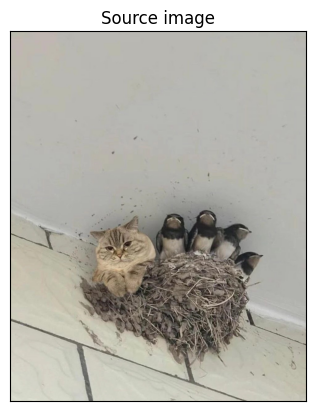

In [69]:
import cv2
import cv2 as cv
import numpy
import numpy as np
import math
from pa_utils import ShowImages

fn = "images/cat.png"
I = cv.imread(fn, cv.IMREAD_COLOR)
if not isinstance(I, np.ndarray) or I.data == None:
  print("Error reading file \"{}\"".format(fn))
else:
  ShowImages([("Source image", I)])

Also we will import `ShowImages()` function from the first practical assignment to use it here. It is placed in `pa_utils`.

In [70]:
from pa_utils import ShowImages

### 1.2 Read and display an image

Now let's open our image which we will use during the current task. We will open it in BGR and convert to grayscale. We will use previously introduced functions for image display.

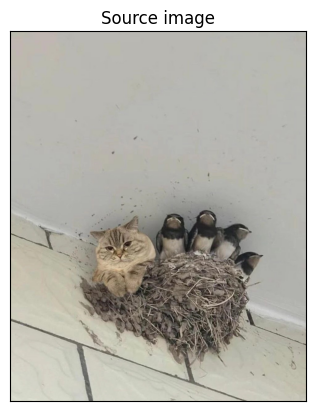

In [71]:
fn = "images/cat.png"
I = cv.imread(fn, cv.IMREAD_COLOR)
if not isinstance(I, np.ndarray) or I.data == None:
  print("Error reading file \"{}\"".format(fn))
else:
  ShowImages([("Source image", I)])

### 1.3 Linear transformations

**Linear transformation** (also called **Linear mapping**) --- is a mapping that preserves the infinitesimal figures shape and the angles between curves at their intersection points. The main linear mapping are Euclidean transformations. These transformations include shift, flip, uniform scaling, and rotation. Linear transformations are a affine transformations subset.


#### 1.3.1 Image shift

The simplest image transformation is an image shift. System equations and coordinates transformation matrix $T$ in case of image *shift* $A=E=1$, $B=D=0$ take the form:

$$
	\begin{cases}
		x'=x+C \\
		y'=y+F
	\end{cases} 
$$

Which can be also written in the vector form

$$
	\begin{bmatrix} 
		x' & y' & 1
	\end{bmatrix} =
	\begin{bmatrix} 
		x & y & 1
	\end{bmatrix}
	T
$$

And gives us a very simple transformation matrix

$$
	T =
	\begin{bmatrix} 
		1 & 0 & 0 
		\\ 0 & 1 & 0
		\\ C & F & 1
	\end{bmatrix}
$$

where $C$ and $F$ are the shift values along axes $Ox$ and $Oy$ correspondingly.



As we use OpenCV, we should define this matrix in the following form:

$$
	T =
	\begin{bmatrix} 
		1 & 0 & C 
		\\ 0 & 1 & F
	\end{bmatrix},
$$

In OpenCV implementation for the Python programming language the transformation matrix is a simple `numpy` array with dimensions $3 \times 2$, so it can be created by calling the `numpy.float32()` function. Then, the `cv2.warpAffine()` function should be used to perform the affine transformation. Its first argument is an image to transform, the second one is the transformation matrix and the third one is a resolution to be used when creating the resulting image. It returns a transformed image as a result. As the image resolution may be changed during the image transformation, this could be accounted and given as a third image parameter. In case of image shift, the resolution is changed by the shift value, so we will account this by increasing the image size.

**Please note** Since numpy arrays are used to store images, so all methods that are applicable to numpy arrays can be executed for images as well. However this results in a little problem as images and matrices has a different order of width (number of columns) and height (number of rows) definition way. In general, image is defined by $width \times height$, however matrix is defined by $rows \times columns$, so in the image shape parameter `I.shape` the image resolution is stored as numbers of rows and columns, but OpenCV functions, e.g, the transformation function, the resolution is defined as width by height, so it should get the numbers of columns and number of rows.

First, let's try shifting an image without setting the desired transformed image resolution.

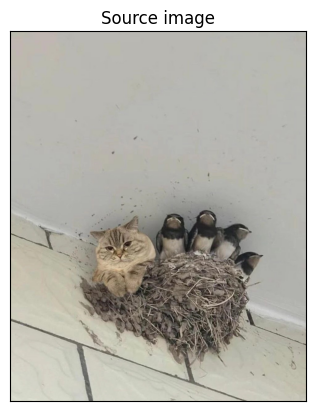

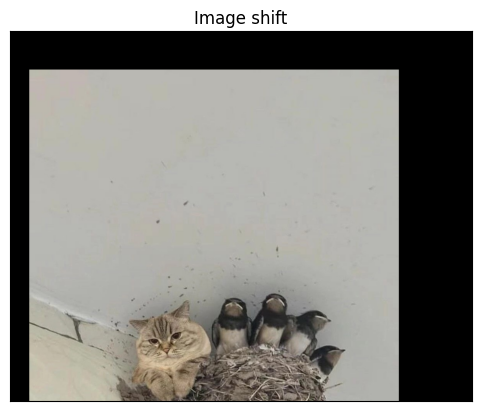

In [72]:
# Create transformation matrix and call cv.warpAffine
shift_x, shift_y = (50, 100)
T = np.float32([[1, 0, shift_x], 
                [0, 1, shift_y]])
Ishift = cv.warpAffine(I, T, I.shape[0:2])

# Display it
ShowImages([("Source image", I), 
            ("Image shift", Ishift)])

As you can see, some part of the image was lost due to to fact that transformed image data now moved outside of the image canvas. To correct it we should know the desired transformed image resolution and pass the correct value as a third argument to the `cv2.warpAffine()` function. The transformed image resolution is a tuple for the transformed image width and height. In current case it should be equal to $(width + 50, height  + 100)$.

Let's account for it as well.

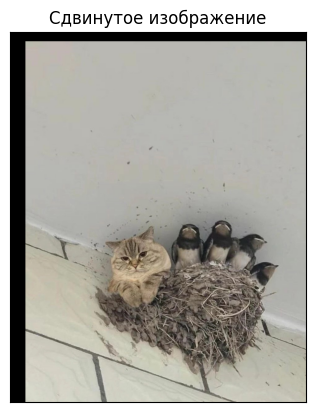

In [73]:
# Сдвиг изображения
# Определяем матрицу сдвига (Tx=50, Ty=30 - сдвиг на 50 пикселей вправо и 30 вниз)
h, w = I.shape[:2]
M = np.float32([[1, 0, 50], [0, 1, 30]])
shifted_image = cv.warpAffine(I, M, (w, h))

# Отображаем сдвинутое изображение
ShowImages([("Сдвинутое изображение", shifted_image)])


As you see now image is shifted and due to a resolution change no image information is lost.

---
> ***Self-work***
>
> Shift an image to the left and up by $(-50, -100)$. Don't forget to change the image resolution when transforming an image. It should be decreased by the shift vector.
---

In [74]:
# TODO Place your solution for part 1 here
# Create a matrix for shift
# Calculate the transformed image resolution
# Apply the transformation with cv2.warpAffine() function 
# Display the result
Ishift3 = np.zeros_like(I)


#### 1.3.2 Image flip

The transformation equation and coordinates transformation matrix $T$ parameters in case of *image flip* around the axis $Ox$ (along axis $oY$) are $A=1$, $E=-1$, $B=C=D=F=0$. Then equations and matrix will take the form:

$$
	\begin{cases}
		x'=x \\
		y'=-y
	\end{cases} 
	\Rightarrow
	T=
	\begin{bmatrix} 
		1 & 0 & 0 
		\\ 0 & -1 & 0
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

In case of OpenCV the transformation matrix should be defined as:

$$
	T =
	\begin{bmatrix} 
		1 & 0 & 0 
		\\ 0 & -1 & 0
	\end{bmatrix}
$$

Let's run it.

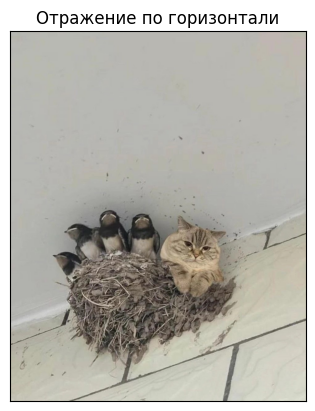

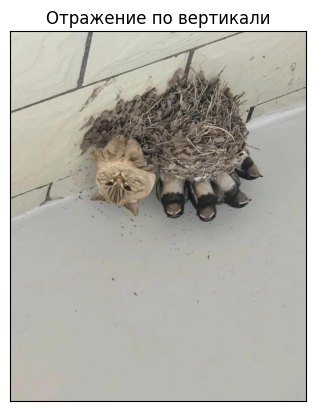

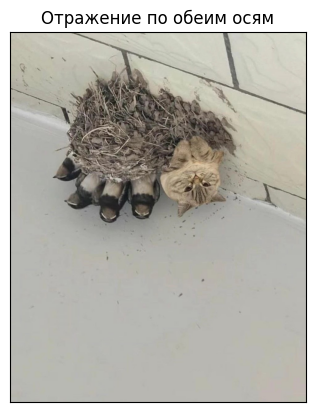

In [75]:
flipped_horizontally = cv.flip(I, 1)
flipped_vertically = cv.flip(I, 0)
flipped_both = cv.flip(I, -1)

ShowImages([
    ("Отражение по горизонтали", flipped_horizontally),
    ("Отражение по вертикали", flipped_vertically),
    ("Отражение по обеим осям", flipped_both)
])

As you see, we got a black image. This happened because after flipping an image, all pixel coordinates became negative and got outside of the image area. So, we have to shift them to the image area by shifting our image right by $rows - 1$:

$$
	T =
	\begin{bmatrix} 
		1 & 0 & 0 
		\\ 0 & -1 & I.rows - 1
	\end{bmatrix}
$$

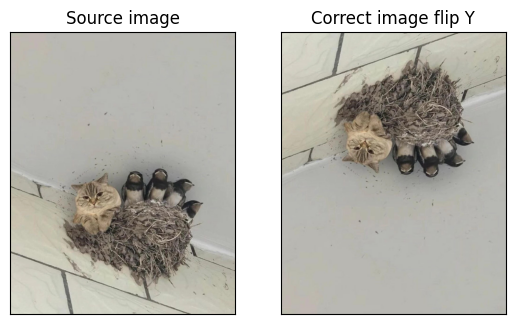

In [76]:
# Flip around Ox
T = np.float32([[1, 0, 0], 
                [0, -1, I.shape[0] - 1]])
Iflip_y_2 = cv.warpAffine(I, T, I.shape[:2][::-1])

# Display it
ShowImages([("Source image", I), 
            ("Correct image flip Y", Iflip_y_2)], 2)

OpenCV also provides a function for fast flipping an image called `flip()`. It takes one parameter in addition to an image to flip. The value $0$ means flipping along $Ox$ axis, $1$ is for flipping along $Oy$ axis, and $-1$ is to flip along both axes. 

Let's try doing the same flip with OpenCV built-in function.

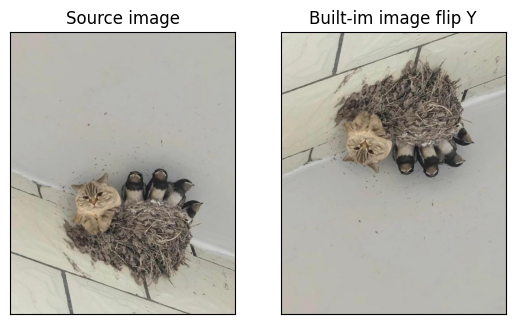

In [77]:
# Flip around Ox
Iflip_y_ocv = cv.flip(I, 0)

# Display it
ShowImages([("Source image", I), 
            ("Built-im image flip Y", Iflip_y_ocv)], 2)

---
> ***Self-work***
>
> Flip an image along both axis ($Ox$ and $Oy$). Implement two solutions:
>
> 1. Create the transformation matrix and apply it with `cv2.warpAffine()` function (you may either create a single transformation matrix or apply transformation two times: for $Ox$ and $Oy$ axis);
> 2. Use the OpenCV built-in `cv2.flip()` function.
>
> Compare the results, they should match.
---

In [78]:
# TODO Place your solution for part 1 here
# Create a matrix for flip (either one matrix for single flip or two matrices for flip around Ox and around Oy)
# Apply the transformation with cv2.warpAffine() function
# Display the result
Iflip_xy = np.zeros_like(I)


In [79]:
# TODO Place your solution for part 2 here
# Flip the image with cv2.flip() function
# Display the result
Iflip_xy_ocv = np.zeros_like(I)


Did your rotation results match? Don't forget to check it. There might be a little difference due to a different floating point values processing.

#### 1.3.3 Uniform image scale

The transformation equation and coordinates transformation matrix $T$ parameters in case of *image scale* by $\alpha$ along $oX$ axis and $\beta$ along $oY$ axis are $A=\alpha$, $E=\beta$, $B=C=D=F=0$. Then equations and matrix will take the form:

$$
	\begin{cases}
		x'={\alpha}x, \alpha > 0 \\
		y'={\beta}y, \beta > 0
	\end{cases}
	\Rightarrow 
	T=
	\begin{bmatrix} 
		\alpha & 0 & 0 
		\\ 0 & \beta & 0
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

If $\alpha<1$ and $\beta<1$, then the image decreases in size, if $\alpha>1$ and $\beta>1$ then it increases. If $\alpha \ne \beta$, then the proportions will not be the same in width and height. In general, this mapping will be affine, not linear.

In case of using OpenCV libraries the transformation matrix should be defined as:

$$
	T =
	\begin{bmatrix} 
		\alpha & 0 & 0 
		\\ 0 & \beta & 0
	\end{bmatrix},
$$

When resizing an image we should also change the image size as well, so the new image size will be $(width \cdot \alpha \times height \cdot \beta)$. This can be accounted by the third argument of the `cv2.warpAffine()` function which takes a tuple for the transformed image size.

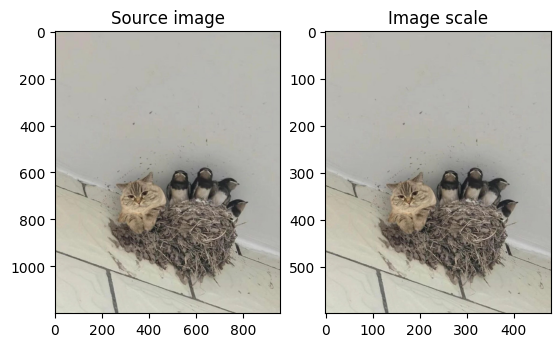

In [80]:
# Image scale
scale = (0.5, 0.5)
T = np.float32([[scale[0], 0, 0], 
                [0, scale[1], 0]])
Iscale = cv.warpAffine(I, T, (int(I.shape[1] * scale[0]), int(I.shape[0] * scale[1]))) 

# Display it (here we have to show axes to see the image resize results)
ShowImages([("Source image", I), 
            ("Image scale", Iscale)], 2, hide_axes = False)

OpenCV also provides function called `resize()` to resize an image in a single command. We may use it as well.

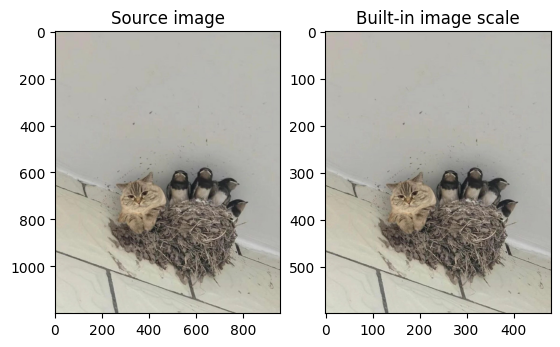

In [81]:
# Image scale
scale = (0.5, 0.5)
Iscale_ocv = cv.resize(I, None, fx = scale[0], fy = scale[1], interpolation = cv.INTER_CUBIC)

# Display it (here we have to show axes to see the image resize results)
ShowImages([("Source image", I), 
            ("Built-in image scale", Iscale_ocv)], 2, hide_axes = False)

---
> ***Self-work***
>
> Scale an image to upscale it by one and a half times (scale factor $1.5$ along both axis). Implement two solutions:
>
> 1. Create the transformation matrix and apply it with `cv2.warpAffine()` function;
> 2. Use the OpenCV built-in `scale()` function.
>
> Compare the results, they should match. Don't forget that this transformation should change the image size.
---

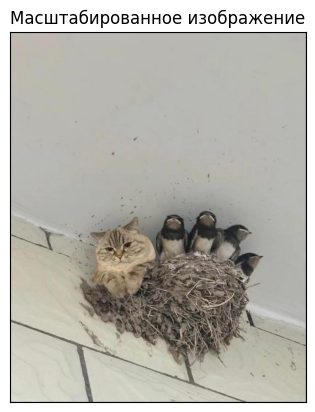

In [82]:
scale_factor = 1.5  # Коэффициент масштабирования

new_w = int(I.shape[1] * scale_factor)
new_h = int(I.shape[0] * scale_factor)

M = np.float32([[scale_factor, 0, 0], [0, scale_factor, 0]])

scaled_image = cv.warpAffine(I, M, (new_w, new_h))

ShowImages([("Масштабированное изображение", scaled_image)])

In [83]:
# TODO Place your solution for part 2 here
# Scale the image with cv2.scale() function
# Display the result
Iscale15_ocv = np.zeros_like(I)


Did your rotation results match? Don't forget to check it. There might be a little difference due to a different floating point values processing.

#### 1.3.4 Image rotation

The transformation equation and coordinates transformation matrix $T$ parameters in case of *image rotation* by $\varphi$ degree clockwise around the coordinate system center  are $A=\cos \varphi$, $B=-\sin \varphi$, $D=\sin \varphi$, $E=\cos \varphi$, $C=F=0$. Then equations and matrix will take the form:

$$
	\begin{cases}
		x'=x \cos \varphi - y \sin \varphi \\
		y'=x \sin \varphi + y \cos \varphi
	\end{cases}
	\Rightarrow 
	T=
	\begin{bmatrix} 
		{\cos \varphi} & {-\sin \varphi} & 0 
		\\ {\sin \varphi} & {\cos \varphi} & 0
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

If $\varphi = 90^{\circ}$, then $\cos \varphi = 0$ and $\sin \varphi = 1$ and transformation equation take the form:

$$
	\begin{cases}
		x'=-y \\
		y'=x
	\end{cases} 
	\Rightarrow 
	T=
	\begin{bmatrix} 
		0 & -1 & 0 
		\\ 1 & 0 & 0
		\\ 0 & 0 & 1
	\end{bmatrix}
$$




In case of using OpenCV libraries the transformation matrix should be defined as:

$$
	T =
	\begin{bmatrix} 
		{\cos \varphi} & {- \sin \varphi} & 0 
		\\ {\sin \varphi} & {\cos \varphi} & 0
	\end{bmatrix}
$$

Let's do it.

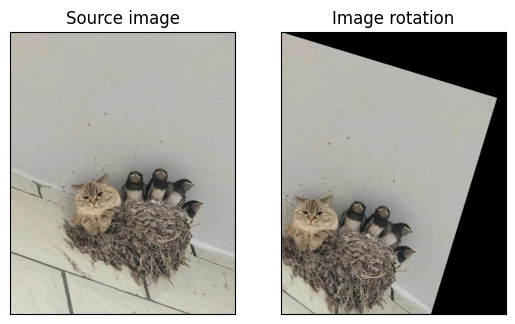

In [84]:
# Image rotation
phi = 17.0 * math.pi / 180 # angle should be defined in radians
T = np.float32([[math.cos(phi),  -math.sin(phi), 0], 
                [math.sin(phi),   math.cos(phi), 0]])
Irotate = cv.warpAffine(I, T, I.shape[:2][::-1]) 

# Display it
ShowImages([("Source image", I), ("Image rotation", Irotate)], 2)

The image is really rotated around the coordinate system center which is top left corner, however in general we would like to rotate it around an arbitrary point. To do it, the rotations should be defined as a set of image transformations which are:

1. Shift an image so that the rotation point is in the top left corner;
2. Rotate it with a given angle;
3. Shift it back. 

This can be written in a matrix form and then executed as a single affine transformation:

$$
	T_{shift} =
	\begin{bmatrix} 
		1 & 0 & -(I.cols - 1) / 2
		\\ 0 & 1 & -(I.rows - 1) / 2
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

$$
	T_{rotate} =
	\begin{bmatrix} 
		{\cos \varphi} & {- \sin \varphi} & 0 
		\\ {\sin \varphi} & {\cos \varphi} & 0
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

$$
	T_{shiftback} =
	\begin{bmatrix} 
		1 & 0 & (I.cols - 1) / 2
		\\ 0 & 1 & (I.rows - 1) / 2
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

Here $T_{shift}$ matrix is a forward shift to match $(0, 0)$ with image center, $T_{rotate}$ is rotation matrix, and $T_{shiftback}$ is backward shift to move image back to place after rotation. Then the final transformation matrix $T$ is calculated by multiplying these three transformation matrices and taking two first rows from it.

$$T = T_{shiftback} \times T_{rotate} \times T_{shift}$$

Let's implement it with OpenCV and rotate our image around its center.

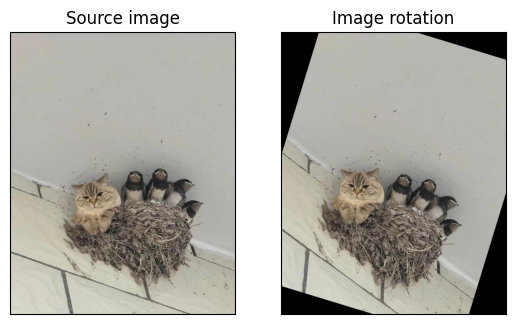

In [85]:
# Image rotation around image center
phi = 17.0 * math.pi / 180 # angle should be defined in radians
Tshift = np.float32([[1, 0, -(I.shape[1] - 1) / 2.0], 
                     [0, 1, -(I.shape[0] - 1) / 2.0], 
                     [0, 0, 1]])
Trotate = np.float32([[math.cos(phi), -math.sin(phi), 0], 
                      [math.sin(phi),  math.cos(phi), 0], 
                      [0, 0, 1]])
Tshiftback = np.float32([[1, 0, (I.shape[1] - 1) / 2.0], 
                         [0, 1, (I.shape[0] - 1) / 2.0], 
                         [0, 0, 1]])
T = np.matmul(Tshiftback, np.matmul(Trotate, Tshift))[0:2, :]

Irotate2 = cv.warpAffine(I, T, I.shape[:2][::-1])

# Display it
ShowImages([("Source image", I), ("Image rotation", Irotate2)], 2)

Finally, the OpenCV `getRotationMatrix2D()` function can be used to calculate the rotation matrix for counter-clockwise rotation of an image around arbitrary point on an arbitrary angle and scaling.

Let's try it too.

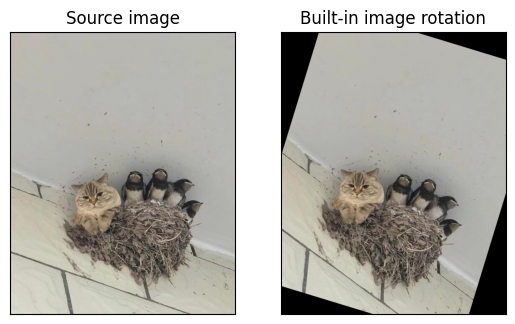

In [86]:
# Image rotation around image center
phi = 17.0 # here we use degrees to define an angle
T = cv.getRotationMatrix2D(((I.shape[1] - 1) / 2.0, (I.shape[0] - 1) / 2.0), -phi, 1)
Irotate_ocv = cv.warpAffine(I, T, I.shape[:2][::-1])

# Display it
ShowImages([("Source image", I), ("Built-in image rotation", Irotate_ocv)], 2)

---
> ***Self-work***
>
> Rotate an image around the center of the bottom left quarter with coordinates $(\dfrac{1}{4} \cdot width, \dfrac{3}{4} \cdot height)$ by $45\degree$ clockwise. Implement two solutions:
>
> 1. Create the rotation matrix manually with three matrices;
> 2. Use the OpenCV built-in `getRotationMatrix2D()` function.
>
> Compare the results, they should match
---

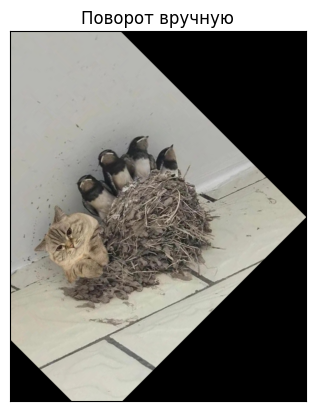

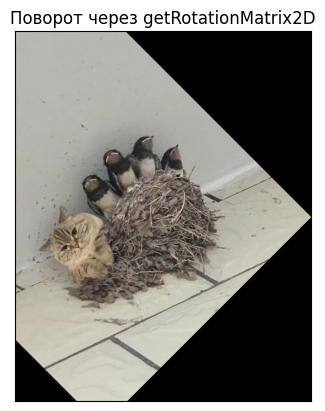

In [87]:
angle = 45  # Угол поворота в градусах

# Определяем центр поворота (нижний левый квартал)
center_x = int(I.shape[1] * 1/4)
center_y = int(I.shape[0] * 3/4)
center = (center_x, center_y)

# 1. Создание матрицы вручную с тремя матрицами (сдвиг -> поворот -> обратный сдвиг)
M_translate1 = np.array([[1, 0, -center_x], [0, 1, -center_y], [0, 0, 1]])
M_rotate = np.array([
    [math.cos(math.radians(-angle)), -math.sin(math.radians(-angle)), 0],
    [math.sin(math.radians(-angle)), math.cos(math.radians(-angle)), 0],
    [0, 0, 1]
])
M_translate2 = np.array([[1, 0, center_x], [0, 1, center_y], [0, 0, 1]])

# Итоговая матрица
M_manual = M_translate2 @ M_rotate @ M_translate1
M_manual = M_manual[:2, :]  # Преобразуем в 2x3 для warpAffine

# 2. Использование getRotationMatrix2D
M_opencv = cv.getRotationMatrix2D(center, angle, 1.0)

# Применение обеих матриц
rotated_manual = cv.warpAffine(I, M_manual, (I.shape[1], I.shape[0]))
rotated_opencv = cv.warpAffine(I, M_opencv, (I.shape[1], I.shape[0]))

# Отображаем результаты
ShowImages([
    ("Поворот вручную", rotated_manual),
    ("Поворот через getRotationMatrix2D", rotated_opencv)
])


In [88]:
# TODO Place your solution for part 2 here
# Create the rotation matrix with cv2.getRotationMatrix2D() function
# Apply transformation with cv2.warpAffine() function
# Display the result
Irotate45_ocv = None


Did your rotation results match? Don't forget to check it. There might be a little difference due to a different floating point values processing.

#### 1.3.5 Arbitrary affine transformation

**Affine mapping** is a mapping, in which parallel lines go into parallel lines, intersect lines into intersect lines, cross lines into cross lines; the segments lengths ratios of lying on the one straight line (or on parallel lines) are preserved, and the figures areas ratios are preserved also. Basic transformations are linear transformations, bevel and non-uniform scaling. An arbitrary affine transformation can be obtained using the sequential product of the basic transformation matrices. In continuous geometry, any affine transformation has an inverse affine transformation, and the product of the direct and inverse transformations gives a unit transformation that leaves all points in place without changing. Affine transformations are a subset of projection transformations.

| ![Affine mapping](images/affine.png "Affine mapping") | 
|:--:| 
| *Affine mapping* |


Such transformation can be defined by three pairs of points and then the transformation matrix will be calculated from a linear equations system. Let us assume we have three pairs of matching points: $P_{src} = \lbrace(x_1, y_1), (x_2, y_2), (x_3, y_3)\rbrace$ which matches $P_{dst} = \lbrace(x'_1, y'_1), (x'_2, y'_2), (x'_3, y'_3)\rbrace$. Then after substitution to the transformation equations we will get:

$$
	\begin{cases}
    x'_1 = x_1 \cdot A + y_1 \cdot B + C \\
    y'_1 = x_1 \cdot D + y_1 \cdot E + F \\
    x'_2 = x_2 \cdot A + y_2 \cdot B + C \\
    y'_2 = x_2 \cdot D + y_2 \cdot E + F \\
    x'_3 = x_3 \cdot A + y_3 \cdot B + C \\
    y'_3 = x_3 \cdot D + y_3 \cdot E + F
  \end{cases}
$$

Which gives us six linear equations with 6 variables. Solving these equations will give us the transformation matrix. To do it, the `getAffineTransform()` function can be used, it takes 3 pairs of points as arguments and returns the corresponding transformation matrix.

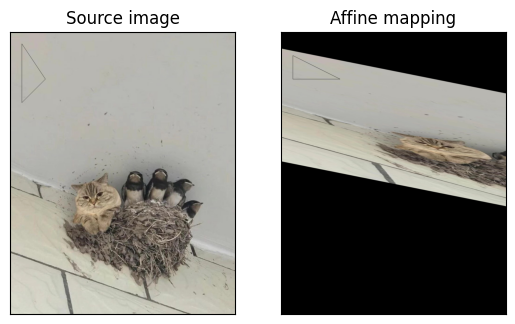

In [89]:
# Calculate the transformation matrix
Psrc = np.float32([[50, 300], [150, 200], [50, 50]]) 
Pdst = np.float32([[50, 200], [250, 200], [50, 100]]) 
T = cv.getAffineTransform(Psrc, Pdst) 
Iaffine = cv.warpAffine(I, T, I.shape[:2][::-1]) 

# Draw triangles on source and transformed images
Icopy = I.copy()
Iaffine_copy = Iaffine.copy()
cv.polylines(Icopy, [Psrc.astype(np.int32)], True, (0, 0, 0), 1)
cv.polylines(Iaffine_copy, [Pdst.astype(np.int32)], True, (0, 0, 0), 1)

# Display it
ShowImages([("Source image", Icopy), ("Affine mapping", Iaffine_copy)], 2)

---
> ***Self-work***
>
> Implement the backward transformation of the `Iaffine` image. The transformation should use `Pdst` points as a source data and `Psrc` points as the destination. Transformed image should match the source image, however some areas may be black due to a data loss.
---

In [90]:
# TODO Place your solution here
# Calculate the transformation matrix for transformation from Pdst to Psrc
# Apply transformation with cv2.warpAffine() function
# Display the result


#### 1.3.6 Image bevel

The transformation equation and coordinates transformation matrix $T$ parameters in case of *image bevel* by factor $s$ along $oX$ axis are $A=E=1$, $B=s$, $C=D=F=0$. Then equations and matrix will take the form:

$$
	\begin{cases}
		x'=x+sy, \\
		y'=y,
	\end{cases}
	\Rightarrow 
	T=
	\begin{bmatrix} 
		1 & 0 & 0 
		\\ s & 1 & 0
		\\ 0 & 0 & 1
	\end{bmatrix}
$$

With OpenCV this will give us the following transformation matrix:

$$
	T=
	\begin{bmatrix} 
		1 & 0 & 0 
		\\ s & 1 & 0
	\end{bmatrix}
$$

We know how to implement it. Let's do it.

---
> ***Self-work***
>
> Implement the image bevel transformation according with the matrix above with $s = 0.3$ and run it.
---

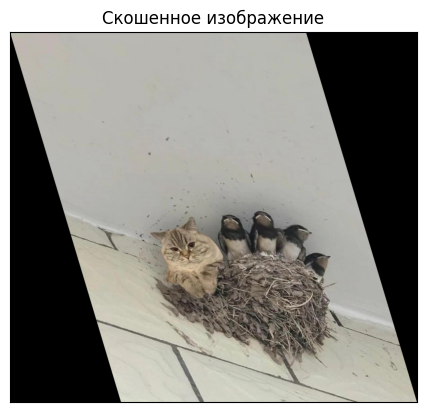

In [91]:
# Скос изображения (Bevel Transformation)
s = 0.3  # Коэффициент сдвига

# Создаем матрицу преобразования для скоса
M = np.float32([[1, s, 0], [0, 1, 0]])

# Определяем новые размеры изображения после трансформации
new_w = int(I.shape[1] + s * I.shape[0])
new_h = I.shape[0]

# Применяем аффинное преобразование (warpAffine)
skewed_image = cv.warpAffine(I, M, (new_w, new_h))

ShowImages([("Скошенное изображение", skewed_image)])


#### 1.3.7 Piecewise linear mapping

In some cases we don't need to transform the whole image. *Piecewise-Linear Mapping* is a mapping in which the image is split into parts, and then various linear transformations are applied to each of these parts separately.

When using OpenCV the piecewise operation can be performed with creation of ROI (Region of Interest) image. This ROI type of image shares the data with initial one but can be used as a completely separate image. In Python the ROI for an image is implemented using numpy array indexing and slicing.

Let's try using piecewise linear mapping to scale the right half of an image.

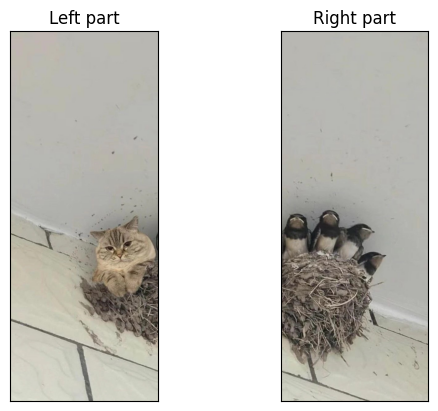

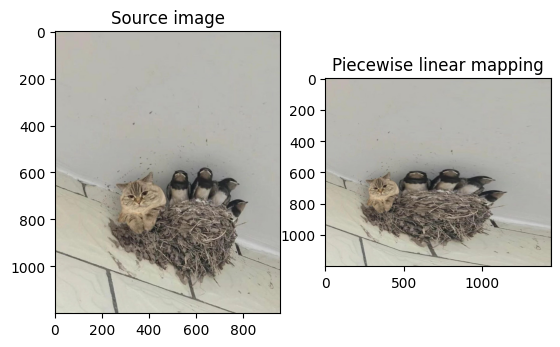

In [92]:
# Fill the transformation matrix
stretch = 2
T = np.float32([[stretch, 0, 0], 
                [0,       1, 0]])

# Split and display image parts
Ileft = I[:, 0:int(I.shape[1] / 2), :]
Iright = I[:, int(I.shape[1] / 2):, :]
ShowImages([("Left part", Ileft), ("Right part", Iright)], 2)

# Transform right part and stitch
Iright = cv.warpAffine(Iright, T, (int(Iright.shape[1] * stretch), Iright.shape[0]))
Iplm = np.concatenate((Ileft, Iright), axis = 1) 

# Display the result
ShowImages([("Source image", I), 
            ("Piecewise linear mapping", Iplm)], 2, hide_axes = False)

---
> ***Self-work***
>
> Implement the piecewise linear mapping transformation and scale the right part of an image with scale factor $0.5$.
---

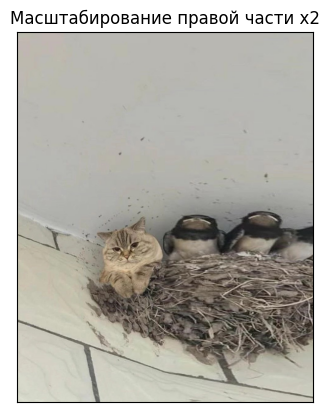

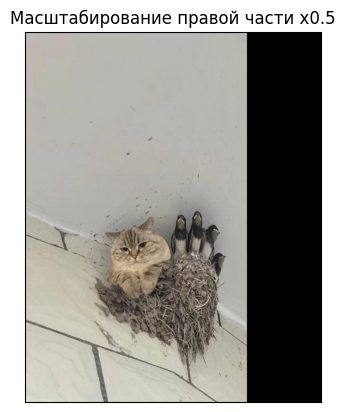

In [93]:
def piecewise_linear_mapping(img, scale_factor):
    rows, cols = img.shape[:2]
    t = np.float32([[scale_factor, 0, 0], [0, 1, 0]])
    img[:, int(cols / 2):] = cv.warpAffine(img[:, int(cols / 2):], t, (cols - int(cols / 2), rows))
    return img

piecewiselinear2 = piecewise_linear_mapping(I.copy(), 2)  # Увеличение в 2 раза
piecewiselinear05 = piecewise_linear_mapping(I.copy(), 0.5)  # Уменьшение в 2 раза

ShowImages([
    ("Масштабирование правой части x2", piecewiselinear2),
    ("Масштабирование правой части x0.5", piecewiselinear05)
])


### 1.4 Nonlinear transformations

When considering geometric transformations, it is assumed that the images were obtained using an ideal camera model. In fact, imaging is accompanied by various nonlinear distortions. So, the nonlinear functions are used to correct them.

| ![Nonlinear distortion examples](images/nonlinear.png "Nonlinear distortion examples") | 
|:--:| 
| *Nonlinear distortion examples* |

#### 1.4.1 Perspective mapping

**Perspective mapping** is a mapping, in which straight lines remain straight lines, however, the figure geometry may be distorted, because this mapping generally does not preserve the lines parallelism. The property preserved under this mapping is points *collinearity*: three points lying on one straight line (collinear) remain on one straight line after mapping. Projection mapping can be as *parallel* (scale is changed), and *perspective* (the figure geometry is changed). 

| ![Perspective mapping](images/projective.png "Perspective mapping") | 
|:--:| 
| *Perspective mapping: straight lines remain straight, but parallel ones may intersect* |

In the case of a perspective mapping a three-dimensional scene point $\mathbf{P}^3$ projected onto a two-dimensional image plane $\mathbf{P}^2$. This mapping $\mathbf{P}^3 \to \mathbf{P}^2$ maps the scene Euclidean point $P=(x,y,z)$ (in homogeneous coordinates $(x',y',z',w')$) in the image point $X=(x,y)$ (in homogeneous coordinates $(x',y',w')$). To find the points Cartesian coordinates from homogeneous coordinates, we use the following relations: $P=(\dfrac{x'}{w'}, \dfrac{y'}{w'}, \dfrac{z'}{w'})$ --- are coordinates of the vector $\vec P$ and $X=(\dfrac{x'}{w'}, \dfrac{y'}{w'})$ ---  are coordinates of the vector $\vec X$. Substituting in~(\ref{baseTransformHomo}) $w=1$ for vector $\vec X$ we obtain the equations system:

$$
	\begin{cases}
		x'=\dfrac{Ax+By+C}{Gx+Hy+I}, \\
		y'=\dfrac{Dx+Ey+F}{Gx+Hy+I},
	\end{cases}
	\Rightarrow 
	T=
	\begin{bmatrix} 
		A & B & C 
		\\ D & E & F
		\\ G & H & 1
	\end{bmatrix}
$$

Due to the coordinates normalization to $w'$ in general, the projection mapping is nonlinear.

With OpenCV we can define projective transformation matrix same as we did for the affine transformtaion, then use the `cv.warpPerspective()` function to apply it.

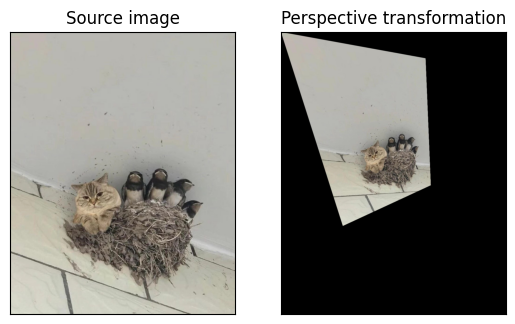

In [94]:
# Perspective transformation
T = np.float32([[1.1, 0.35, 0], [0.2, 1.1, 0], [0.00075, 0.0005, 1]])
Ipersp = cv.warpPerspective(I, T, I.shape[:2][::-1])

# Display it
ShowImages([("Source image", I), ("Perspective transformation", Ipersp)], 2)

OpenCV also provides a handy `cv.getPerspectiveTransform()` function for the projective transformation matrix calculation for an arbitrary projection mapping can be calculated by specifying the coordinates of four source points $P_{srd} = \lbrace(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4)\rbrace$ and their coordinates after transformation $P_{dst} = \lbrace(x'_1, y'_1), (x'_2, y'_2), (x'_3, y'_3), (x'_4, y'_4)\rbrace$. It works a way similar as calculation of an affine trnasformation matrix: solves the system of linear equations.

Let's try it.

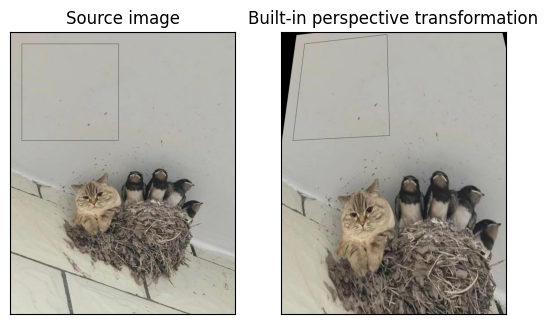

In [95]:
# Perspective transformation
Psrc = np.float32([[50, 461], [461, 461], [461, 50], [50, 50]]) 
Pdst = np.float32([[50, 461], [461, 440], [450, 10], [100, 50]]) 
T = cv.getPerspectiveTransform(Psrc, Pdst) 
Ipersp2 = cv.warpPerspective(I, T, I.shape[:2][::-1])

# Draw points on source and transformed images
Icopy = I.copy()
cv.polylines(Icopy, [Psrc.astype(np.int32)], True, (0, 0, 0), 1)
cv.polylines(Ipersp2, [Pdst.astype(np.int32)], True, (0, 0, 0), 1)

# Display it
ShowImages([("Source image", Icopy), ("Built-in perspective transformation", Ipersp2)], 2)

---
> ***Self-work***
>
> Implement the backward perspective transformation of the `Ipersp2` image. The transformation should use `Pdst` points as a source data and `Psrc` points as the destination. Transformed image should match the source image, however some areas may be black due to a data loss.
---

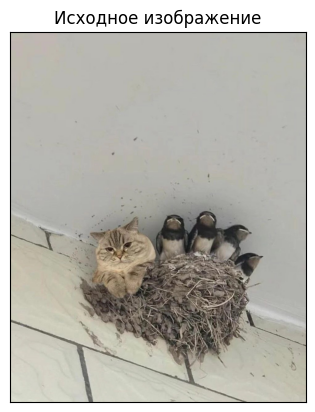

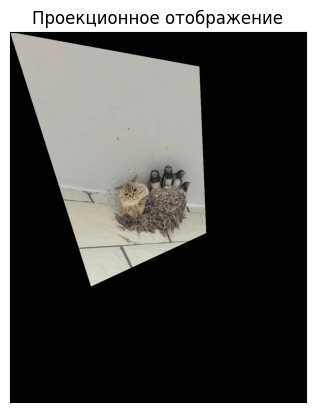

In [96]:
# Перспективное преобразование изображения

def projection(img, arr):
    rows, cols = img.shape[:2]
    t = np.float32(arr)  # Преобразуем массив в float32
    return cv.warpPerspective(img, t, (cols, rows))

# Применяем перспективное преобразование
T = [[1.1, 0.35, 0], [0.2, 1.1, 0], [0.00075, 0.0005, 1]]
Ipersp = projection(I, T)

# Отображаем результат
ShowImages([
    ("Исходное изображение", I),
    ("Проекционное отображение", Ipersp)
])

#### 1.4.2 Polynomial mapping

**Polynomial mapping** is an original image mapping using polynomials. In this case, the coordinate transformation matrix $T$ will contain the polynomials coefficients of the corresponding orders for the coordinates $x$ and $y$. For example, in case of polynomial mapping of the *second order* equations system takes the following form:

$$
	\begin{cases}
		x'=a_1+a_2x+a_3y+a_4x^2+a_5xy+a_6y^2 \\
		y'=b_1+b_2x+b_3y+b_4x^2+b_5xy+b_6y^2
	\end{cases}
$$

Where $x$, $y$ are the point coordinates in one coordinate system, and $x'$, $y'$ are points coordinates in another coordinate system, $a_1 \dots a_6$, $b_1 \dots b_6$ are the mapping coefficients. 


OpenCV has no built-in function for such kind of transformatios, and indexing array pixel by pixel is very ineffective when wring program with Python programming language. Instead of this two arrays for source and destination indexes should be calculated to copy data from one array to another in a single command. To create re-indexing arrays with Python, a `numpy.meshgrid()` array constructor is used. It creates two arrays to store $X$ and $Y$ coordinates for each image pixel. Then these coordinates are transformed to be used when mapping new image pixels with old ones. The `mask` is used to exclude pixels that became out of range after transformation.

Let's implement a polynomial mapping with a given transformation coefficient as a matrix $T$ using OpenCV:

$$x' = 0 + 1 \cdot x + 0 \cdot y + 0.00001 \cdot x^2 + 0.002 \cdot x y + 0.001 \cdot y^2$$
$$y' = 0 + 0 \cdot x + 1 \cdot y + 0 \cdot x^2 + 0 \cdot x y + 0 \cdot y^2$$


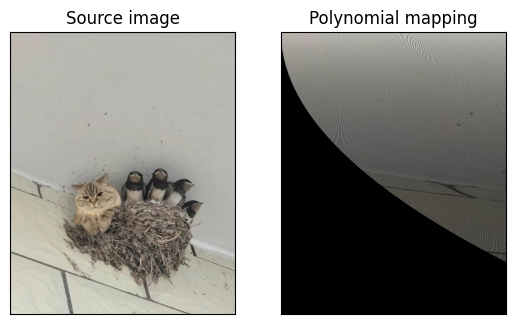

In [97]:
# Polynomial mapping
T = np.array([[0, 0], [1, 0], [0, 1], [0.00001, 0],	[0.002, 0], [0.001, 0]])
# x' = a0 + a1 x + a2 y + a3 x^2 + a4 xy + a5 y^2 
# y' = b0 + b1 x + b2 y + b3 x^2 + b4 xy + b5 y^2
# where
# a = T[:, 0]
# b = T[:, 1]

# Create mesh grid for X, Y coordinates
x, y = np.meshgrid(np.arange(I.shape[1]), np.arange(I.shape[0]))

# Calculate new coordinates for X, Y
x_new = np.round(T[0, 0] + x * T[1, 0] + y * T[2, 0] + x ** 2 * T[3, 0] + x * y * T[4, 0] + y ** 2 * T[5, 0]).astype(np.float32)
y_new = np.round(T[0, 1] + x * T[1, 1] + y * T[2, 1] + x ** 2 * T[3, 1] + x * y * T[4, 1] + y ** 2 * T[5, 1]).astype(np.float32)

# Create a mask where new coordinates are valid
mask = np.logical_and(np.logical_and(x_new >= 0, x_new < I.shape[1]), 
                      np.logical_and(y_new >= 0, y_new < I.shape[0]))

# Apply new coordinates
Ipoly = np.zeros(I.shape, I.dtype)
if I.ndim == 2:
  Ipoly[y_new[mask].astype(int), x_new[mask].astype(int)] = I[y[mask], x[mask]]
else:
  Ipoly[y_new[mask].astype(int), x_new[mask].astype(int), :] = I[y[mask], x[mask], :]

# Display it
ShowImages([("Source image", I), ("Polynomial mapping", Ipoly)], 2)

Since not every pixel on the new image has the corresponding pixel color value the black areas appeared. It can be converted by interpolating the missing pixel values using the known ones.

---
> ***Self-work***
>
> Implement the polynomial mapping of the source image with following formula:
>
> $x' = 0 + 1 \cdot x + 0 \cdot y + 0 \cdot x^2 + 0 \cdot x y + 0 \cdot y^2$
>
> $y' = 0 + 0 \cdot x + 1 \cdot y + 0.001 \cdot x^2 + 0.002 \cdot x y + 0.00001 \cdot y^2$
---

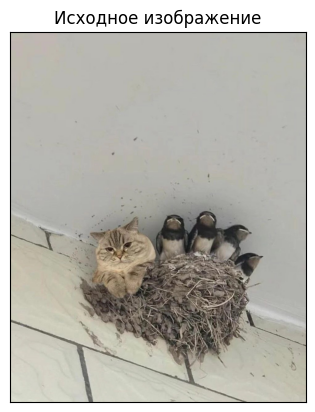

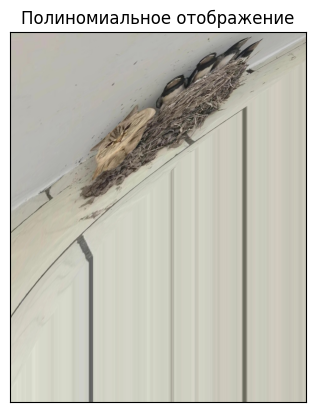

In [98]:
# Полиномиальное преобразование изображения

def polynomial_mapping(img):
    rows, cols = img.shape[:2]
    
    # Создаем массив координат (x, y)
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # Вычисляем новые координаты
    x_new = 0 + 1 * x + 0 * y + 0 * x**2 + 0 * x * y + 0 * y**2
    y_new = 0 + 0 * x + 1 * y + 0.001 * x**2 + 0.002 * x * y + 0.00001 * y**2
    
    # Ограничиваем координаты, чтобы не выходили за границы изображения
    x_new = np.clip(x_new, 0, cols - 1).astype(np.float32)
    y_new = np.clip(y_new, 0, rows - 1).astype(np.float32)
    
    # Применяем преобразование с помощью remap
    mapped_image = cv.remap(img, x_new, y_new, interpolation=cv.INTER_LINEAR)
    
    return mapped_image

# Применяем полиномиальное преобразование
I_poly = polynomial_mapping(I)

# Отображаем результат
ShowImages([
    ("Исходное изображение", I),
    ("Полиномиальное отображение", I_poly)
])

#### 1.4.3 Sinusoidal distortion

Harmonic distortion of an image can be considered as another example of nonlinear transformation.

Let's try creating the sinusoidal distortion. For this we will use OpenCV remapping feature whith allows to remap the whole image by defining the pixel coordinates in the source coordinate system for each pixel of the transformed image. This is implemented by the `remap()` function which transforms image according to new pixel coordinates specified for each pixel of the source image.

Let's apply the sinusoidal distortion along $Ox$ axis.

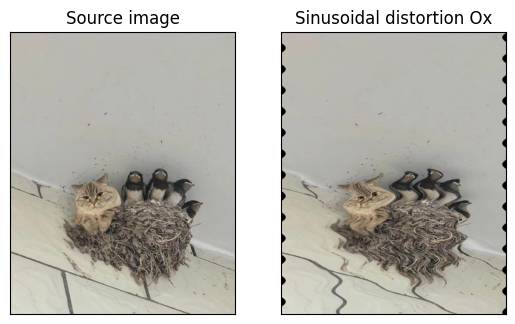

In [99]:
# Create mesh grid for X, Y coordinates
x, y = np.meshgrid(np.arange(I.shape[1]), np.arange(I.shape[0]))

# Distort the X coordinate depending on Y
x = x + 20 * np.sin(2 * math.pi * y / 90)

# Remap with new coordinates
Isin_x = cv.remap(I, x.astype(np.float32), y.astype(np.float32), cv.INTER_LINEAR)

# Display it
ShowImages([("Source image", I), ("Sinusoidal distortion Ox", Isin_x)], 2)

---
> ***Self-work***
>
> Implement the sinusoidal distortion along $Oy$ axis with same parameter values.
---

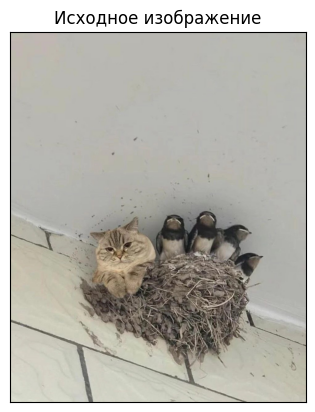

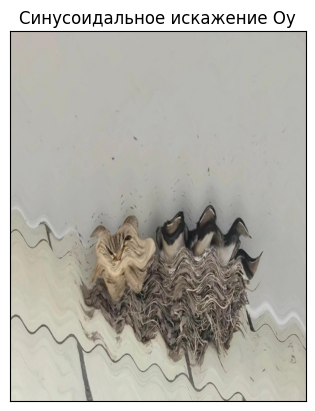

In [100]:
# Синусоидальное искажение изображения вдоль оси Oy

def sinusoidal_distortion_oy(img):
    rows, cols = img.shape[:2]
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    y = y + 20 * np.sin(2 * np.pi * x / 90)  # Амплитуда 20, период 90 пикселей
    y = np.clip(y, 0, rows - 1).astype(np.float32)
    Isin_y = cv.remap(img, x.astype(np.float32), y, interpolation=cv.INTER_LINEAR)
    
    return Isin_y

I_sin_y = sinusoidal_distortion_oy(I)

# Отображаем результат
ShowImages([
    ("Исходное изображение", I),
    ("Синусоидальное искажение Oy", I_sin_y)
])

## Task 2. Distortion correction

*Select an arbitrary image with either pincushion or barrel distortion. Correct the image.*

When the optical system is forming an image, *distortion* may occur on the image. 

**Distortion** is an optical distortion that is expressed in the curvature of straight lines. Light rays passing through the center of the lens converge at a point farther from the lens than rays passing through the edge of the lens. Straight lines are curved, except for those that lie in the same plane with the optical axis. For example, the image of a square, the center of which intersects the optical axis, looks like a pillow (pincushion distortion*) with positive distortion and looks like a barrel (*barrel distortion*) with negaitive distortion.

| ![Distortions examples](images/distortions.png "Distortions examples") | 
|:--:| 
| *Distortions examples. Left is the original image, center is a pincushion distortion, right is a barrel distortion* |

Let $\vec{r}=(x,y)$ --- vector specifying two coordinates in a plane perpendicular to the optical axis. For an ideal image, all rays leaving this point and passing through the optical system will hit the image point with coordinates $\vec{R}$, which are determined by the formula:

$$
	\vec{R}=b_0\vec{r}
$$

Where $b_0$ is a linear increasing parameter.

If distortion of a higher order is present (for axisymmetric optical systems, the distortion can only be of odd orders: third, fifth, seventh, etc.), then it is necessary to add the appropriate terms:

$$
	\vec{R}=b_0\vec{r}+F_3r^2\vec{r}+F_5r^4\vec{r}+\dots
$$

where $r$ is the vector length $\vec{r}$; $F_i, i=3,5,\dots,n$ are the distortion coefficients of $n$-th order, which contribute the most to the distortion of the image shape. With third-order distortion, if the coefficient $F_3$ has the same sign as $b_0$: $sign(F_3)=sign(b_0)$, pincushion distortion occurs, otherwise a barrel distortion occurs. 

To correct the distortion, the approach described above for affine of projective transformation is used. An image of a regular grid and its distorted image is used, pairs of points on these images are found, and the coefficients of the corrective transformation are calculated.

### 2.1 Barrel distortion

To distort an image we will do the following steps:

1. First, create a `meshgrid` for our image pixel coordinates;
2. Then shift the mesh coordinates so that image center has coordinates $(0, 0)$ and transform them to a polar coordinate system;
3. Apply distortion transformation in the polar coordinate system;
4. Convert mesh coordinates back to cartesian coordinate system and shift back;
5. Remap an image with the calculated mesh map.

Let's distort an image according to formula:
$$\vec{R}=\vec{r} + 0.1 \cdot r^2\vec{r} + 0.12 \cdot r^4\vec{r}$$

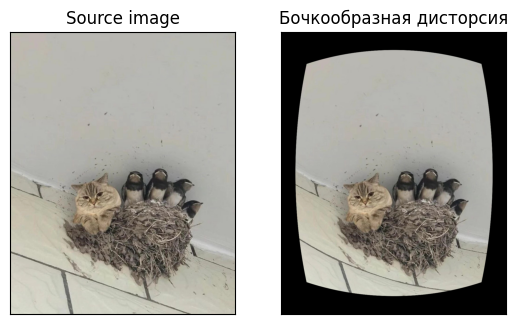

In [101]:
# Create mesh grid for X, Y coordinates
x, y = np.meshgrid(np.arange(I.shape[1]), np.arange(I.shape[0]))

mid = I.shape[1] / 2.0, I.shape[0] / 2.0
x, y = x - mid[0], y - mid[1]

r, theta = cv.cartToPolar(x / mid[0], y / mid[1])
b0 = 1
F3 = 0.1
F5 = 0.12
r = b0 * r + F3 * r ** 3 + F5 * r ** 5
u, v = cv.polarToCart(r, theta)
u = u * mid[0] + mid[0]
v = v * mid[1] + mid[1]

Ibarrel = cv.remap(I, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)

# Display it
ShowImages([("Source image", I), ("Бочкообразная дисторсия", Ibarrel)], 2)

To correct the distortion we need to define a set of matching points on both distored and corrected image. We will calculate these points along radius in polar coordinate system assuming they were defined by user.

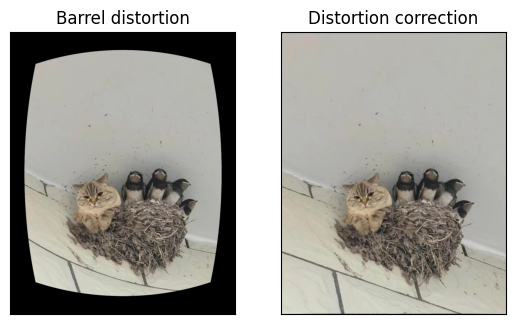

In [102]:
# Calculate the set of matching points
d = 5  # Number of points
max_r = 1.3  # points array scale
Psrc = (np.arange(d, dtype = np.float32) + 1) / d * max_r
Pdst = b0 * Psrc + F3 * Psrc ** 3 + F5 * Psrc ** 5

# Now create and fill matrix for linear equations
T = np.zeros((d, d))
for i in range(d):
  T[:, i] = Pdst ** (i + 1)
# Invert it and calculate coefficients
T = np.linalg.inv(T)
F = np.matmul(T, Psrc)

# Now use the calculated parameters to calculate the new mapping
# x and y are already shifted, so we don't need to repeat it
r, theta = cv.cartToPolar(x / mid[0], y / mid[1])
rt = 0
for i in range(d):
  rt = rt + F[i] * r ** (i + 1)
r = rt

# Now convert back to cartesian
u, v = cv.polarToCart(r, theta)
u = u * mid[0] + mid[0];
v = v * mid[1] + mid[1];

# Apply and display
Ibarrel_corr = cv.remap(Ibarrel, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
ShowImages([("Barrel distortion", Ibarrel), ("Distortion correction", Ibarrel_corr)], 2)

---
> ***Self-work***
>
> Distort an image according with formula $\vec{R}=\vec{r} - 0.2 \cdot r^2\vec{r} + 0.32 \cdot r^4\vec{r}$ and correct the distortion.
---

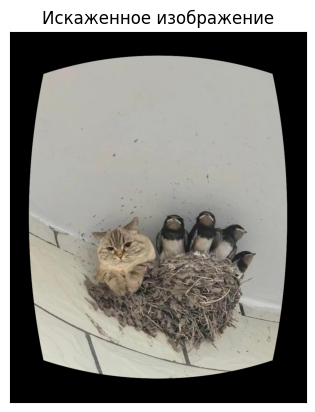

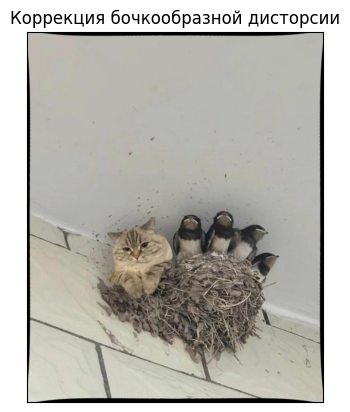

In [119]:
# Коррекция бочкообразной дисторсии

def correct_barrel_distortion(img):
    rows, cols = img.shape[:2]
    
    # Создаем сетку координат
    xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # Центр изображения
    xmid = cols / 2.0
    ymid = rows / 2.0
    xi = xi - xmid
    yi = yi - ymid
    
    # Преобразуем в полярные координаты
    r, theta = cv.cartToPolar(xi / xmid, yi / ymid)
    
    # Коэффициент коррекции дисторсии
    F3 = -0.115  # Значение для компенсации искажения
    
    # Коррекция радиуса
    r = r + F3 * r**3
    
    # Преобразуем обратно в декартовы координаты
    u, v = cv.polarToCart(r, theta)
    u = u * xmid + xmid
    v = v * ymid + ymid
    
    # Применяем коррекцию с помощью remap
    corrected_img = cv.remap(img, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
    
    return corrected_img

# Применяем коррекцию
I_corrected = correct_barrel_distortion(Ibarrel)

# Отображаем результат
ShowImages([
    ("Искаженное изображение", Ibarrel),
    ("Коррекция бочкообразной дисторсии", I_corrected)
])

### 2.2 Pincushion distortion

The pincushion distortion is calculated a similar way but with different parameters.

Let's distort an image according to formula:
$$\vec{R}=1.3 \cdot \vec{r} - 0.15 \cdot r^2\vec{r}$$

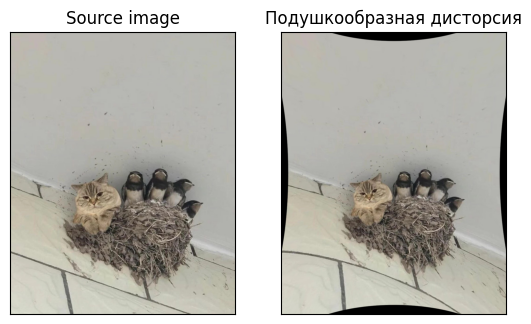

In [104]:
# Create mesh grid for X, Y coordinates
x, y = np.meshgrid(np.arange(I.shape[1]), np.arange(I.shape[0]))

mid = I.shape[1] / 2.0, I.shape[0] / 2.0
x, y = x - mid[0], y - mid[1]

r, theta = cv.cartToPolar(x / mid[0], y / mid[1])
b0 = 1.2
F3 = -0.15
F5 = 0
r = b0 * r + F3 * r ** 3 + F5 * r ** 5
u, v = cv.polarToCart(r, theta)
u = u * mid[0] + mid[0]
v = v * mid[1] + mid[1]

Ipincushion = cv.remap(I, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)

# Display it
ShowImages([("Source image", I), ("Подушкообразная дисторсия", Ipincushion)], 2)

Let's correct this one as well.

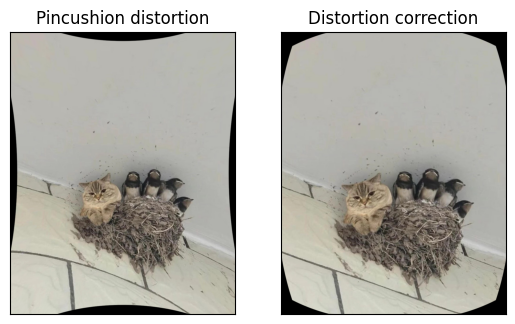

In [111]:
# Calculate the set of matching points
d = 5  # Number of points
max_r = 1.4  # points array scale
Psrc = (np.arange(d, dtype = np.float32) + 1) / d * max_r
Pdst = b0 * Psrc + F3 * Psrc ** 3 + F5 * Psrc ** 5

# Now create and fill matrix for linear equations
T = np.zeros((d, d))
for i in range(d):
  T[:, i] = Pdst ** (i + 1)
# Invert it and calculate coefficients
T = np.linalg.inv(T)
F = np.matmul(T, Psrc)

# Now use the calculated parameters to calculate the new mapping
# x and y are already shifted, so we don't need to repeat it
r, theta = cv.cartToPolar(x / mid[0], y / mid[1])
rt = 0
for i in range(d):
  rt = rt + F[i] * r ** (i + 1)
r = rt

# Now convert back to cartesian
u, v = cv.polarToCart(r, theta)
u = u * mid[0] + mid[0];
v = v * mid[1] + mid[1];

# Apply and display
Ipincushion_corr = cv.remap(Ipincushion, u.astype(np.float32), v.astype(np.float32), cv.INTER_LINEAR)
ShowImages([("Pincushion distortion", Ipincushion), ("Distortion correction", Ipincushion_corr)], 2)

It can be seen this image is also corrected. Black areas appeared because of data loss when the distortion was applied.

---
> ***Self-work***
>
> Distort an image according with formula $\vec{R}=1.3 \cdot \vec{r} - 0.2 \cdot r^2\vec{r} + 0.05 \cdot r^4\vec{r}$ and correct the distortion.
---

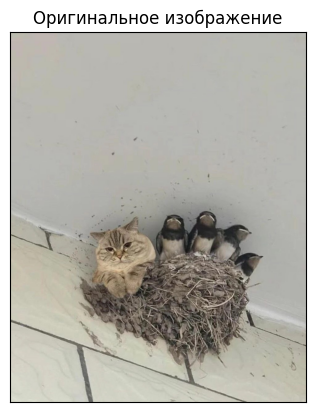

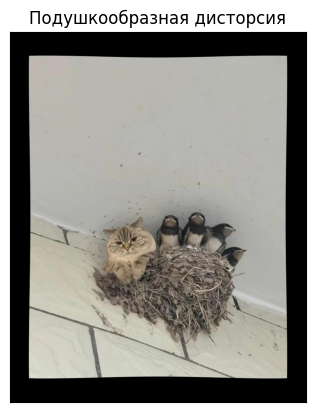

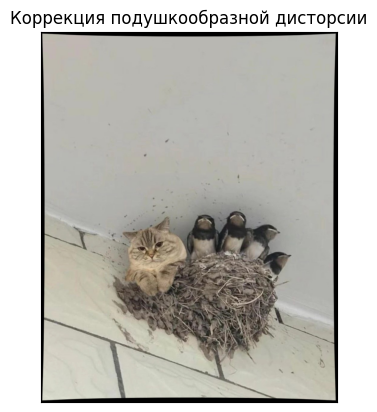

In [ ]:
# Подушкообразная дисторсия и её коррекция

def distort_pincushion(image):
    height, width = image.shape[:2]
    x_grid, y_grid = np.meshgrid(np.arange(width, dtype=np.float32), np.arange(height, dtype=np.float32))
    
    x_center = width / 2.0
    y_center = height / 2.0
    
    x_grid -= x_center
    y_grid -= y_center
    
    r, theta = cv.cartToPolar(x_grid / x_center, y_grid / y_center)
    
    # Применяем искажение по формуле
    r_distorted = 1.3 * r - 0.2 * r**2 + 0.05 * r**4
    
    u, v = cv.polarToCart(r_distorted, theta)
    u = u * x_center + x_center
    v = v * y_center + y_center
    
    distorted_img = cv.remap(image, u, v, interpolation=cv.INTER_LINEAR)
    
    return distorted_img

def correct_pincushion(image):
    height, width = image.shape[:2]
    x_grid, y_grid = np.meshgrid(np.arange(width, dtype=np.float32), np.arange(height, dtype=np.float32))
    
    x_center = width / 2.0
    y_center = height / 2.0
    
    x_grid -= x_center
    y_grid -= y_center
    
    r, theta = cv.cartToPolar(x_grid / x_center, y_grid / y_center)
    
    # Обратная коррекция (инверсия искажения)
    r_corrected = (r + 0.2 * r**2 - 0.05 * r**4) / 1.3
    
    u, v = cv.polarToCart(r_corrected, theta)
    u = u * x_center + x_center
    v = v * y_center + y_center
    
    corrected_img = cv.remap(image, u, v, interpolation=cv.INTER_LINEAR)
    
    return corrected_img

I_distorted = distort_pincushion(I)
I_corrected = correct_pincushion(I_distorted)

# Отображаем результаты
ShowImages([
    ("Оригинальное изображение", I),
    ("Подушкообразная дисторсия", I_distorted),
    ("Коррекция подушкообразной дисторсии", I_corrected)
])

## Task 3. Stitching images

*Select two images (photographs from a cam- era, fragments of a scanned image, etc.) which have an overlapping area. Correct the second image to translate it into the coordinate system of the first one; then perform automatic “glueing” from two images into the one.*

Geometric transformations can be used, for example, to create mosaics from multiple images. Mosaic "*stitching*", "*gluing*") is the combination of two or more images into a single one, and the images coordinate systems  being glued may differ due to different shooting angles, changes in the camera position or the object movement. However, it is necessary that both images have overlapping areas, i.e. they were attended by the same objects.

### 3.1 Manual image stitching

The main task of processing such images is to bring them into a common coordinate system. As a common coordinate system, you can use the system of the first image, then you need to find the coordinate transformation of all pixels of the second image $(x,y)$ to the common coordinate system $(x',y')$. If there is a projective distortion, then to recalculate the coordinates, you can use the projective transformation. In the case of an affine mapping, the transformation takes the form:

$$
	\begin{cases}
		x'=a_1+a_2x+a_3y, \\
		y'=b_1+b_2x+b_3
	\end{cases}
$$

Therefore, it is only necessary to find only 3 parameters for each coordinate:

$$
	\begin{bmatrix}
		a_1  \\ a_2 \\ a_3
	\end{bmatrix}
	=
	\begin{bmatrix}
		1 & x_1 & y_1
		\\ 1 & x_2 & y_2
		\\ 1 & x_3 & y_3
	\end{bmatrix}^{-1}
	\begin{bmatrix}
		x'_1  \\ x'_2 \\ x'_3
	\end{bmatrix}
$$

$$
	\begin{bmatrix}
		b_1  \\ b_2 \\ b_3
	\end{bmatrix}
	=
	\begin{bmatrix}
		1 & x_1 & y_1
		\\ 1 & x_2 & y_2
		\\ 1 & x_3 & y_3
	\end{bmatrix}^{-1}
	\begin{bmatrix}
		y'_1  \\ y'_2 \\ y'_3
	\end{bmatrix}
$$

To do this we will search for a correlation between two images. We will take severla bottom rows of the first image and serach for a correlation of these rows in a second image.

In OpenCV the correlation between two images and it is calculated with `matchTemplate()` function. This functions checks correlation with a given template over the whole image and returns an image with size $I.size - template.size$ where foe the `TM_CCOEFF` mode the higher the value is the higher is the correlation rate when matching a template from this point. We need to select the highest correlation point and shift the second image by this value before merging using the ROI image indexing.

Let's do it.

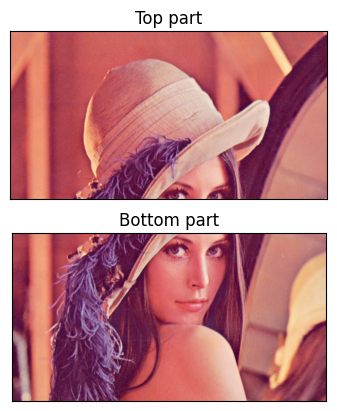

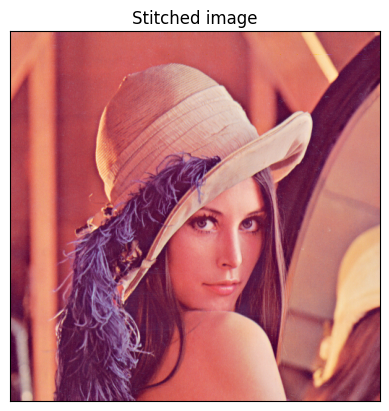

In [132]:
fn_top = "images/lena_top.png";
fn_bottom = "images/lena_bottom.png";

# Read an images from files
Itop = cv.imread(fn_top, cv.IMREAD_COLOR)
if not isinstance(Itop, np.ndarray) or Itop.data == None:
  print("Error reading file \"{}\"".format(fn_top))
Ibottom = cv.imread(fn_bottom, cv.IMREAD_COLOR)
if not isinstance(Ibottom, np.ndarray) or Ibottom.data == None:
  print("Error reading file \"{}\"".format(fn_bottom))

# Show parts of image
ShowImages([("Top part", Itop), ("Bottom part", Ibottom)], 1)

# Match template
templ_size = 10
templ = Itop[-templ_size:, :, :]
res = cv.matchTemplate(Ibottom, templ, cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

# Stitch images
Istitch = np.zeros((Itop.shape[0] + Ibottom.shape[0] - max_loc[1] - templ_size, 
                    Itop.shape[1], Itop.shape[2]), dtype = np.uint8)
Istitch[0:Itop.shape[0], :, :] = Itop
Istitch[Itop.shape[0]:, :, :] = Ibottom[max_loc[1] + templ_size:, :, :]

# Show stitched image
ShowImages([("Stitched image", Istitch)])

---
> ***Self-work***
>
> Take some image, split it into two parts and try stitching it. You can split an image with OpenCV as well and then stitch it back:
> ```Python
> Itop = I[0:int(I.shape[0] / 2) + 20, :, :]
> Ibottom = I[int(I.shape[0] / 2):, :, :]
> ```
---

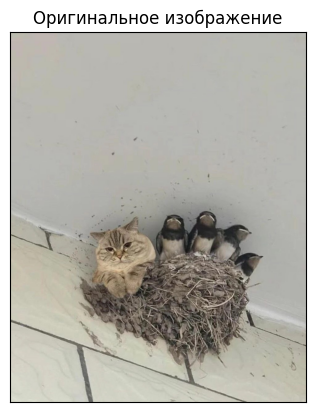

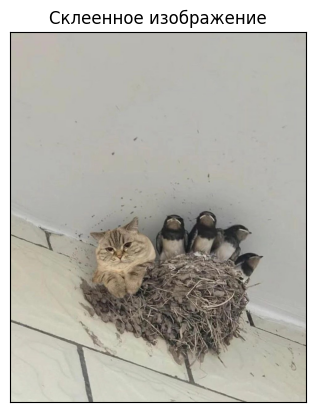

Изображения полностью совпадают!


In [ ]:

def split_and_stitch(image):
    height = image.shape[0]
    
    # Разделяем изображение на две равные части
    Itop = image[:height // 2, :, :]
    Ibottom = image[height // 2:, :, :]
    
    # Склеиваем обратно
    stitched_image = np.vstack((Itop, Ibottom))
    
    return stitched_image

I = cv.imread("images/cat.png")
I_stitched = split_and_stitch(I)
ShowImages([
    ("Оригинальное изображение", I),
    ("Склеенное изображение", I_stitched)
])

difference = cv.absdiff(I, I_stitched)
if np.all(difference == 0):
    print("Изображения полностью совпадают!")
else:
    print("Изображения отличаются.")


### 3.2 Automatic image stitching

OpenCV library provides a special class for automatic stitching of images called `Stitcher`. It is designed to work either for stitching panoramic photos `cv2.Stitcher_PANORAMA` mode or for stitching scanned images `cv2.Stitcher_SCANS` mode. Working with `Stitcher` object is very simple. First, need to create an object. Then need to create an array of OpenCV images and pass them to the `stitch()` method. It returns a tuple with its status and a stitched image. The status value shows wether the stitching succeeded. In case of success it is equal to `cv2.Stitcher_OK`.

**Please note** that this method requires at least tree images to work correctly.

Let's try it.

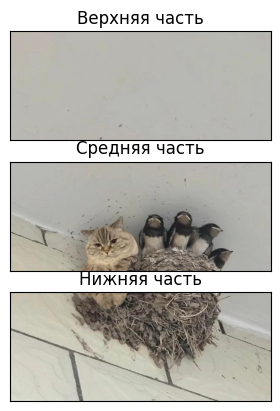

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


In [155]:
I = cv.imread("images/cat.png", cv.IMREAD_COLOR)
if I is None:
    print("Ошибка загрузки изображения")
else:
    height = I.shape[0]
    third = height // 3
    
    fn_top = I[:third, :, :]
    fn_mid = I[third:2*third, :, :]
    fn_bottom = I[2*third:, :, :]
    
    # Отображаем части изображения
    ShowImages([
        ("Верхняя часть", fn_top),
        ("Средняя часть", fn_mid),
        ("Нижняя часть", fn_bottom)
    ], 1)


# Read an images from files
Itop = cv.imread(fn_top, cv.IMREAD_COLOR)
if not isinstance(Itop, np.ndarray) or Itop.data == None:
  print("Error reading file \"{}\"".format(fn_top))
Imid = cv.imread(fn_mid, cv.IMREAD_COLOR)
if not isinstance(Imid, np.ndarray) or Imid.data == None:
  print("Error reading file \"{}\"".format(fn_mid))
Ibottom = cv.imread(fn_bottom, cv.IMREAD_COLOR)
if not isinstance(Ibottom, np.ndarray) or Ibottom.data == None:
  print("Error reading file \"{}\"".format(fn_bottom))

# Show parts of image
ShowImages([("Top part", Itop), ("Mid part", Imid), ("Bottom part", Ibottom)], 1)

# Stitch
stitcher = cv.Stitcher.create(cv.Stitcher_SCANS) 
status, Istitch2 = stitcher.stitch([Itop, Imid, Ibottom])

# Show stitched image in case of success
if status == cv.Stitcher_OK:
  ShowImages([("Stitched image", Istitch2)])
else:
  print("Stitching error occurred")

This OpenCV stitcher object uses more complex stitching algorithm that is based on feature points matching between images, so may not work well for too simple cases.

---
> ***Self-work***
>
> Answer questions and conclude your work results.
---

 ## Questions

Please answer the following questions:

 - How can you rotate an image without using a rotation matrix?
 > Put your answer here
 
 - What is the minimum number of corresponding pairs of points that must be specified on the original and distorted images to correct a perspective distortion?
 > Put your answer here

 - After geometric transformation of the image, pixels with undefined intensity values may appear. What is the reason for this and how can this problem be solved?
 > Put your answer here

 


## Conclusion

What have you learned with this task? Don't forget to conclude it.
 > Put your conclusion here
